In [95]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [96]:
def imagen(img):
    img=cv.imread('G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/'+img,0)
    if img is None:
        img=cv.imread('C:/Users/claudio.pacheco/Documents/Repositorio/'+img,0)
    plt.imshow(img,cmap='gray')
    return img

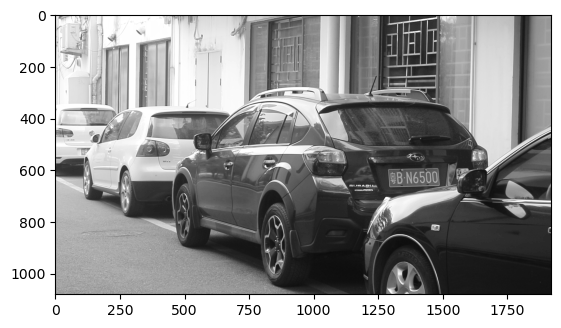

In [97]:
img=imagen('DPP0357.TIF')

a. Escribe código para contar las frecuencias de las intensidades de los píxeles en una imagen en escala de grises de 8 bits. Debes almacenar las frecuencias de intensidades para cada valor de intensidad, de 0 a 255.

In [98]:
#Contar las frecuencias de las intensidades de los pixeles. Los valores deben ser de 0 a 255
def freq(imagen):
    #Crea lista de frecuencias
    frecuencias=[0]*256
    #Recorre la imagen y cuenta las frecuencias. Regresa frecuencias e intensidades como lista de listas
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            frecuencias[imagen[i,j]]+=1
    intensidades=[i for i in range(256)]
    return [intensidades,frecuencias]

b. Imprime una lista de las frecuencias para cada intensidad.

In [99]:
hist=freq(img)
hist

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [100]:
#Calcular el histograma con CalcHist para comparar
hist2=cv.calcHist([img],[0],None,[256],[0,256])

c. Utiliza alguna librería para visualizar el histograma

Text(0.5, 1.0, 'Histograma con CalcHist')

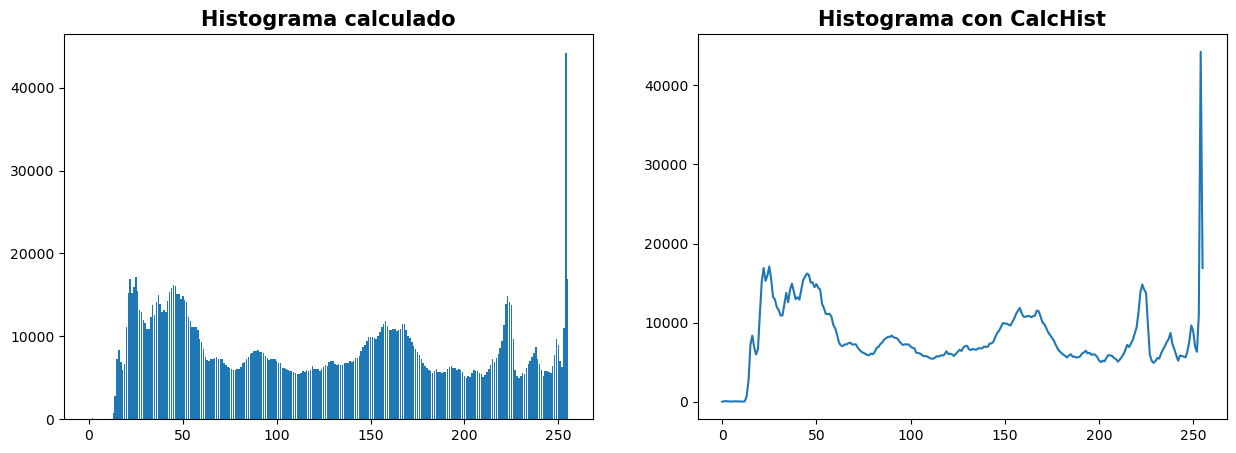

In [108]:
#Visualizar ambos histogramas
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].bar(hist[0],hist[1])
ax[0].set_title('Histograma calculado',fontsize=15,fontweight='bold')
ax[1].plot(hist2)
ax[1].set_title('Histograma con CalcHist',fontsize=15,fontweight='bold')

Elabora un programa que utilice el histograma obtenido previamente para llevar a cabo la ecualización por histograma, siguiendo las mismas restricciones que el punto 1 (sin funciones predeterminadas)

In [105]:
def ecualizar(img):
  # Calcular el histograma 
  hist,bin = np.histogram(img, 256, [0, 255])

# Calcular la función de distribución acumulativa
  cdf = hist.cumsum()
  cdf_normal=((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
  channel_result = cdf_normal.astype('uint8')
  
  imag_nueva=channel_result[img.ravel()]
  imag_nueva = np.reshape(imag_nueva, img.shape)
  # Convertir la imagen ecualizada de vuelta a color.
  return imag_nueva

In [103]:
ecualizada=ecualizar(img)

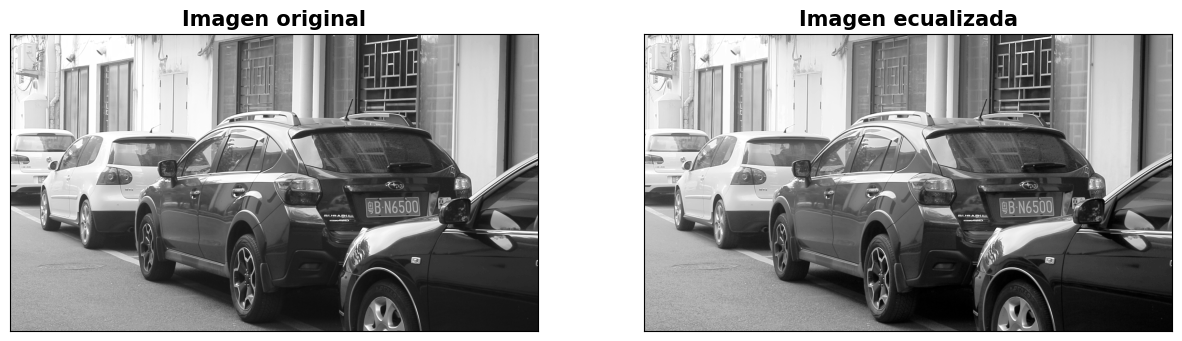

In [107]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Imagen original',fontsize=15,fontweight='bold')
ax[1].imshow(ecualizada,cmap='gray')
ax[1].set_title('Imagen ecualizada',fontsize=15,fontweight='bold')
#Eliminar valores de los ejes
for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])